In [1]:
# Importing all modules
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
pd.set_option('display.max_rows', 550)

![CRISP_DM](../reports/figures/CRISP_DM.png)


# Data Preparation
* focus is always to understand the final data structure
* support each step by visual analytics

# Data Required :
* Covid cases data: John Hopkins dataset (https://github.com/CSSEGISandData/COVID-19.git)
* Vaccination data: John Hopkins Centers for Civic Impact for the Coronavirus Resource Center (CRC)
    (https://github.com/govex/COVID-19/tree/master/data_tables/vaccine_data/global_data)

* Population data (2018): John Hopkins Centers for Civic Impact for the Coronavirus Resource Center (CRC)
 (https://github.com/govex/COVID-19/blob/master/data_tables/world_pop_by_country.csv)

# Phase 1
* The relative cases overtime of Covid infectors (absolute Covid cases/population size) for 3 countries

In [2]:
country_list = ['India','Italy','Germany']

In [3]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw_corona_data=pd.read_csv(data_path)
pd_raw_corona_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181120,181178,181236,181465,181534,181574,181666,181725,181808,181912
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276731,276821,276821,276821,277141,277141,277409,277444,277663,277940
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265937,265943,265952,265964,265968,265971,265975,265985,265993,266006
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43224,43224,43449,43449,43449,43449,43449,43449,43449,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [4]:
#changing the names of the columns and droppping columns namely lat and long as they are geographical concepts and not needed.
pd_data_base=pd_raw_corona_data.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,181120,181178,181236,181465,181534,181574,181666,181725,181808,181912
1,no,Albania,0,0,0,0,0,0,0,0,...,276731,276821,276821,276821,277141,277141,277409,277444,277663,277940
2,no,Algeria,0,0,0,0,0,0,0,0,...,265937,265943,265952,265964,265968,265971,265975,265985,265993,266006
3,no,Andorra,0,0,0,0,0,0,0,0,...,43224,43224,43449,43449,43449,43449,43449,43449,43449,43774
4,no,Angola,0,0,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [5]:
time_idx = pd_data_base.columns[2: ]

main_data = pd.DataFrame({'date':time_idx})

for each in country_list:
   main_data[each] = np.array(pd_data_base[pd_data_base['country']==each].iloc[:,2::].sum(axis=0))

main_data

,date,India,Italy,Germany
0,1/22/20,0,0,0
1,1/23/20,0,0,0
2,1/24/20,0,0,0
3,1/25/20,0,0,0
4,1/26/20,0,0,0
...,...,...,...,...
878,6/18/22,43296692,17844905,27204955
879,6/19/22,43309473,17879160,27211896
880,6/20/22,43319396,17896065,27334993
881,6/21/22,43331645,17959329,27454225


In [6]:
# For plotting the population data
population_in_18= pd.read_csv('https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/world_pop_by_country.csv')

In [7]:
population_in_original = population_in_18.drop(['Country Code',], axis=1)\
                         .rename(columns = {'2018' : 'Population'})\
                         .set_index(['Country Name']).T

In [8]:
for each in country_list:
    main_data[each] = np.array(main_data[each]/float(population_in_original[each]))

In [9]:
main_data

,date,India,Italy,Germany
0,1/22/20,0.000000,0.000000,0.000000
1,1/23/20,0.000000,0.000000,0.000000
2,1/24/20,0.000000,0.000000,0.000000
3,1/25/20,0.000000,0.000000,0.000000
4,1/26/20,0.000000,0.000000,0.000000
...,...,...,...,...
878,6/18/22,0.032010,0.295293,0.328055
879,6/19/22,0.032019,0.295859,0.328139
880,6/20/22,0.032026,0.296139,0.329624
881,6/21/22,0.032035,0.297186,0.331061


<AxesSubplot:title={'center':'The relative cases overtime of Covid infectors (absolut Covid cases/population size'}, xlabel='Date', ylabel='Number of Cases'>

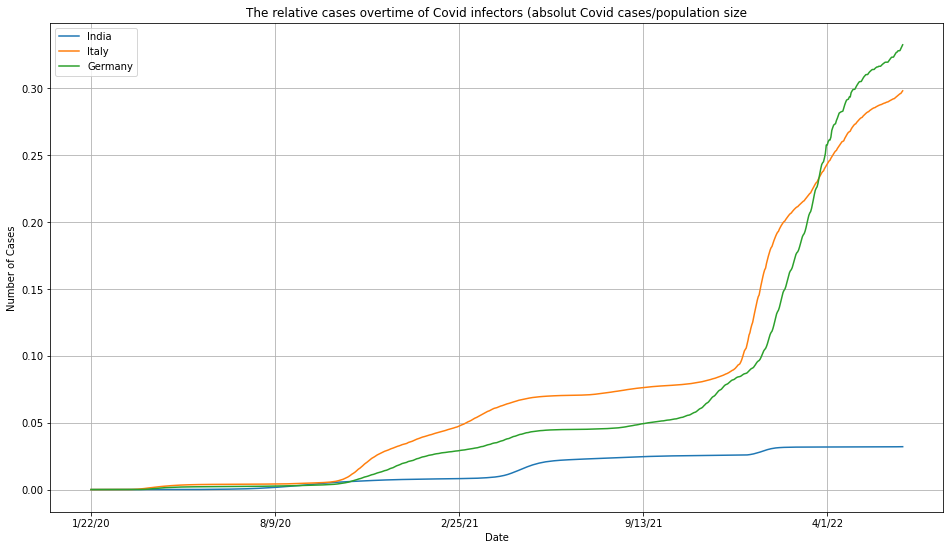

In [17]:
main_data.set_index('date').plot(title="The relative cases overtime of Covid infectors (absolut Covid cases/population size",ylabel= "Number of Cases",xlabel = "Date",grid="on",figsize=(16,9))

## Phase 2:
* The vaccination rate (percentage of the population) over time for 3 countries

In [11]:
vaccine_address = 'https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv'

In [12]:
vaccination_count = pd.read_csv(vaccine_address, usecols = ['Date','Country_Region','People_fully_vaccinated'],parse_dates=['Date'])

In [13]:
vaccination_count_original = vaccination_count[vaccination_count['Country_Region'].isin(country_list)]

In [14]:
vaccination_data = pd.pivot_table(
    data=vaccination_count_original,                                   
    index='Date',                              
    columns='Country_Region',                         
    values='People_fully_vaccinated',   
  
    )

vaccination_data = vaccination_data.fillna(0)

In [15]:
for each in country_list:
   vaccination_data[each] = np.array(vaccination_data[each]/float(population_in_original[each])*100)

<AxesSubplot:title={'center':'The vaccination rate (percentage of the population) over time '}, xlabel='Monthly Period', ylabel='Number of Vaccination'>

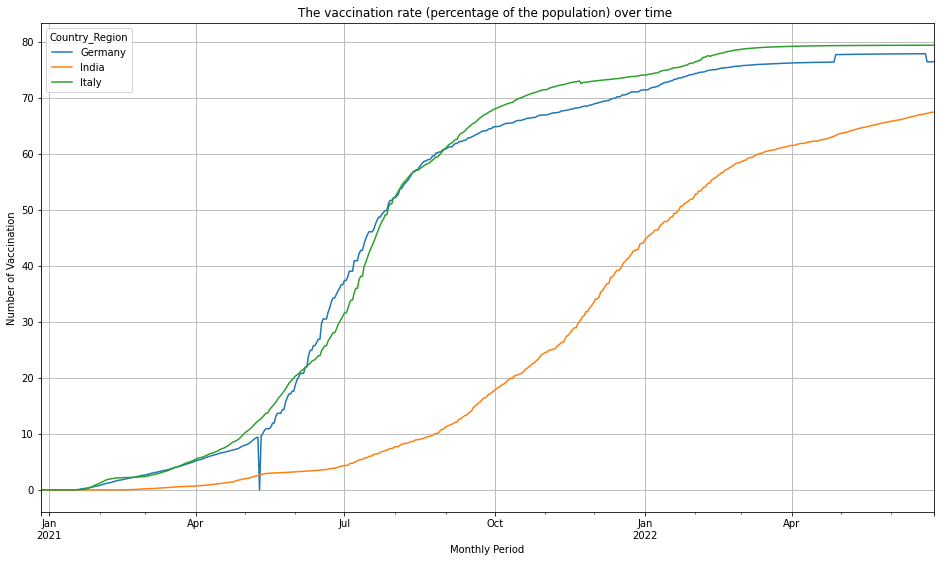

In [18]:
# Plotting
vaccination_data.plot(title="The vaccination rate (percentage of the population) over time ",ylabel= "Number of Vaccination",xlabel = "Monthly Period",grid="on",figsize=(16,9))